<a href="https://colab.research.google.com/github/rohansejwal-netizen/Price-Prediction/blob/main/cat_boost_best_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np

In [75]:
file_path="/content/chennai_80"
chennai_80=pd.read_csv(file_path)

In [76]:
file_path="/content/chennai_20"
chennai_20=pd.read_csv(file_path)

In [77]:
chennai_80

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
0,0,0,0,P03174,Karapakkam,817,28,1.00,Yes,378405,8409000,No Access,4.90,3.20,4.10
1,1,1,1,P01456,Chrompt,988,41,1.00,Yes,218954,8109400,No Access,3.60,4.60,4.80
2,2,2,2,P06191,Karapakkam,521,51,1.00,No,71177,2156875,No Access,4.10,4.20,2.70
3,3,3,3,P08311,Chrompt,1275,146,2.00,No,378235,14008700,Paved,3.00,4.80,3.90
4,4,4,4,P07536,T Nagar,1843,118,2.00,Yes,367560,13613320,No Access,2.10,4.70,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,4156,4156,P04599,Chrompt,912,199,1.00,Yes,359082,11583300,Paved,4.70,3.40,2.60
4157,4157,4157,4157,P09106,Chrompt,906,6,1.00,No,229307,7643550,Gravel,3.90,4.80,4.30
4158,4158,4158,4158,P06324,Karapakkam,672,141,1.00,Yes,301613,6032250,Gravel,3.30,2.90,3.30
4159,4159,4159,4159,P00324,Chrompt,1033,86,1.00,No,358672,11570050,Paved,3.60,4.20,4.80


In [78]:
# Function to calculate outliers using IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count outliers for 'REG_FEE' and 'SALES_PRICE'
outliers_reg_fee = count_outliers_iqr(chennai_80, 'REG_FEE')
outliers_sales_price = count_outliers_iqr(chennai_80, 'SALES_PRICE')

print(f"Number of outliers in 'REG_FEE': {outliers_reg_fee}")
print(f"Number of outliers in 'SALES_PRICE': {outliers_sales_price}")

Number of outliers in 'REG_FEE': 1
Number of outliers in 'SALES_PRICE': 0


In [79]:
# Remove outliers for 'REG_FEE' using IQR
Q1_reg_fee = chennai_80['REG_FEE'].quantile(0.25)
Q3_reg_fee = chennai_80['REG_FEE'].quantile(0.75)
IQR_reg_fee = Q3_reg_fee - Q1_reg_fee
lower_bound_reg_fee = Q1_reg_fee - 1.5 * IQR_reg_fee
upper_bound_reg_fee = Q3_reg_fee + 1.5 * IQR_reg_fee

chennai_80_cleaned = chennai_80[(chennai_80['REG_FEE'] >= lower_bound_reg_fee) & (chennai_80['REG_FEE'] <= upper_bound_reg_fee)]

# Verify the number of outliers in 'REG_FEE' after removal
outliers_reg_fee_cleaned = count_outliers_iqr(chennai_80_cleaned, 'REG_FEE')
print(f"Number of outliers in 'REG_FEE' after removal: {outliers_reg_fee_cleaned}")

Number of outliers in 'REG_FEE' after removal: 0


In [80]:
chennai_80

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
0,0,0,0,P03174,Karapakkam,817,28,1.00,Yes,378405,8409000,No Access,4.90,3.20,4.10
1,1,1,1,P01456,Chrompt,988,41,1.00,Yes,218954,8109400,No Access,3.60,4.60,4.80
2,2,2,2,P06191,Karapakkam,521,51,1.00,No,71177,2156875,No Access,4.10,4.20,2.70
3,3,3,3,P08311,Chrompt,1275,146,2.00,No,378235,14008700,Paved,3.00,4.80,3.90
4,4,4,4,P07536,T Nagar,1843,118,2.00,Yes,367560,13613320,No Access,2.10,4.70,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,4156,4156,P04599,Chrompt,912,199,1.00,Yes,359082,11583300,Paved,4.70,3.40,2.60
4157,4157,4157,4157,P09106,Chrompt,906,6,1.00,No,229307,7643550,Gravel,3.90,4.80,4.30
4158,4158,4158,4158,P06324,Karapakkam,672,141,1.00,Yes,301613,6032250,Gravel,3.30,2.90,3.30
4159,4159,4159,4159,P00324,Chrompt,1033,86,1.00,No,358672,11570050,Paved,3.60,4.20,4.80


In [81]:
 %pip install catboost

In [92]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [88]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/chennai_80')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df =df.loc[:, ~df.columns.str.contains('^PRT_ID')]

# # Separate features and target
# X = df.drop(['SALES_PRICE'], axis=1)
# y = df['SALES_PRICE']


# Separate features and target
X = df.drop(['SALES_PRICE','QS_BATHROOM','QS_BEDROOM','PRT_ID'], axis=1)
y = df['SALES_PRICE']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_chennai_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())

Categorical features: ['AREA', 'PARK_FACIL', 'STREET']
0:	learn: 2871588.5653781	total: 13.4ms	remaining: 4.01s
200:	learn: 912952.9402914	total: 1.62s	remaining: 799ms
299:	learn: 879247.6036734	total: 2.35s	remaining: 0us
✅ Model trained successfully and saved!
Numeric features used: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'REG_FEE', 'QS_ROOMS']


In [90]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# Paths (adjust if your filenames differ)
train_path = '/content/chennai_80'
test_path = '/content/chennai_20'
model_path = '/content/catboost_chennai_model.cbm'

# Load training data to get schema
train_df = pd.read_csv(train_path)
expected_features = [c for c in train_df.columns if c not in ['SALES_PRICE', 'QS_BATHROOM', 'QS_BEDROOM', 'PRT_ID']]


# Detect categorical columns from training data (excluding PRT_ID)
# cat_features = train_df[expected_features].select_dtypes(include=['object']).columns.tolist()
cat_features = [c for c in train_df.columns if c in ['AREA', 'PARK_FACIL', 'STREET']]
print("Categorical features:", cat_features)

# Load trained CatBoost model
model = CatBoostRegressor()
model.load_model(model_path)

# Load test data (without price)
test_df = pd.read_csv(test_path).copy()

# Make sure the test data has same columns as training data
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# Reorder columns to match training
X_test = test_df.drop(['PRT_ID'], axis=1)[expected_features]

# Convert categorical features to string type
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

# Create Pool for CatBoost
test_pool = Pool(data=X_test, cat_features=cat_features)

# Predict prices
predictions = model.predict(test_pool)

# Add predictions to your test dataframe
test_df['PREDICTED_SALES_PRICE'] = predictions

# Save new CSV with predictions
output_path = '/content/Chennai_20_with_predicted_price.csv'
test_df.to_csv(output_path, index=False)

print("✅ Prediction complete! File saved as:", output_path)

# Display predictions in full number format
pd.options.display.float_format = '{:.2f}'.format

display(test_df[['PREDICTED_SALES_PRICE']].head())

Categorical features: ['AREA', 'PARK_FACIL', 'STREET']
✅ Prediction complete! File saved as: /content/Chennai_20_with_predicted_price.csv


,PREDICTED_SALES_PRICE
0,12427032.08
1,8910359.64
2,7977262.67
3,10882127.45
4,8803809.02


In [86]:
file_path="/content/Chennai_20_with_predicted_price.csv"
predicted=pd.read_csv(file_path)

In [91]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/Chennai_20_with_predicted_price.csv'
actual_path = '/content/Chennai_price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['PRT_ID', 'PREDICTED_SALES_PRICE']], on='PRT_ID', how='inner')


# Calculate metrics
r2 = r2_score(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE'])
rmse = np.sqrt(mean_squared_error(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['SALES_PRICE', 'PREDICTED_SALES_PRICE']].head(10)
print("\nSample comparison:")
print(comparison)

R-squared (Accuracy): 0.9032
Root Mean Squared Error (RMSE): 907,997.30

Sample comparison:
   SALES_PRICE  PREDICTED_SALES_PRICE
0     11873250            12427032.08
1      8514030             8910359.64
2      7313720             7977262.67
3     10940805            10882127.45
4      7957500             8803809.02
5      9449730             8883637.95
6      8434750             8317163.36
7      9042050             9097687.64
8      3948000             3780102.92
9     11560690            12108551.82


In [ ]:
chennai_80["SALES_PRICE"].max()

18853070

,Unnamed: 0.1,Unnamed: 0,INT_SQFT,DIST_MAINROAD,N_BEDROOM,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
Unnamed: 0.1,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.01,0.01,-0.03,0.02
Unnamed: 0,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.01,0.01,-0.03,0.02
INT_SQFT,-0.02,-0.02,1.00,0.00,0.66,0.63,0.63,0.01,-0.01,0.01
DIST_MAINROAD,-0.01,-0.01,0.00,1.00,-0.00,0.02,0.02,0.01,-0.03,-0.01
N_BEDROOM,-0.04,-0.04,0.66,-0.00,1.00,0.37,0.33,0.01,-0.01,0.01
REG_FEE,0.00,0.00,0.63,0.02,0.37,1.00,0.84,0.02,-0.02,0.01
SALES_PRICE,0.01,0.01,0.63,0.02,0.33,0.84,1.00,0.02,-0.02,0.02
QS_ROOMS,0.01,0.01,0.01,0.01,0.01,0.02,0.02,1.00,-0.01,0.01
QS_BATHROOM,-0.03,-0.03,-0.01,-0.03,-0.01,-0.02,-0.02,-0.01,1.00,0.00
QS_BEDROOM,0.02,0.02,0.01,-0.01,0.01,0.01,0.02,0.01,0.00,1.00


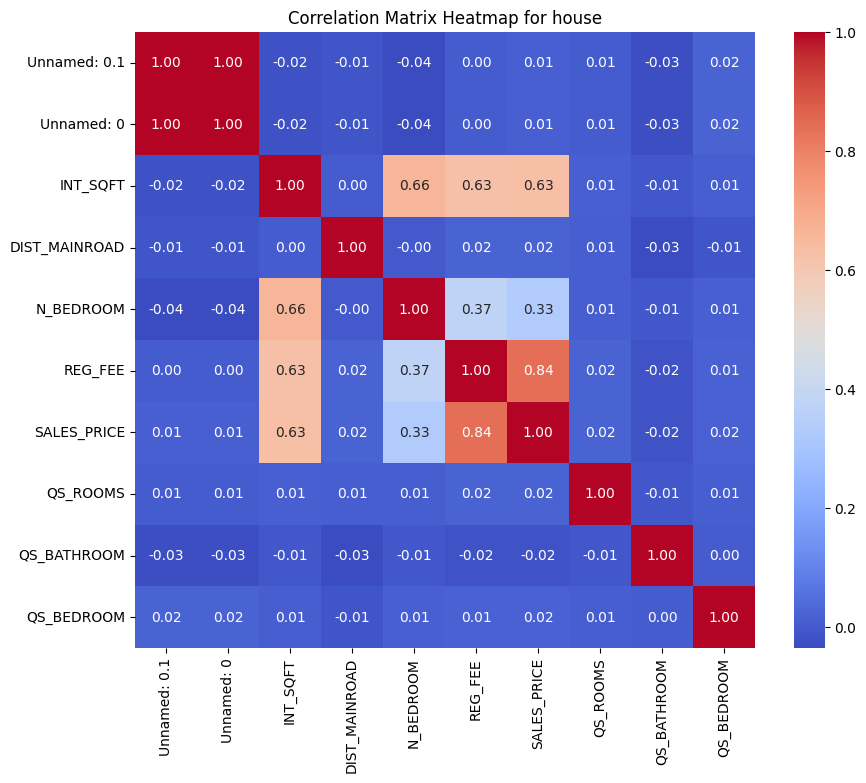

In [14]:
correlation_matrix_chennai_80 = chennai_80.corr(numeric_only=True)
display(correlation_matrix_chennai_80)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_chennai_80, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for house')
plt.show()

In [ ]:
# chennai_80.drop(columns=["Unnamed: 0.3","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"], axis=1, inplace=True)

In [15]:
file_path="/content/chennai_20"
chennai_20=pd.read_csv(file_path)

In [ ]:
# chennai_20.drop(columns=["Unnamed: 0.3","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"], axis=1, inplace=True)


In [ ]:
# chennai_80.to_csv("chennai_80")
# chennai_20.to_csv("chennai_20")


Skewness: 0.21078040602728818


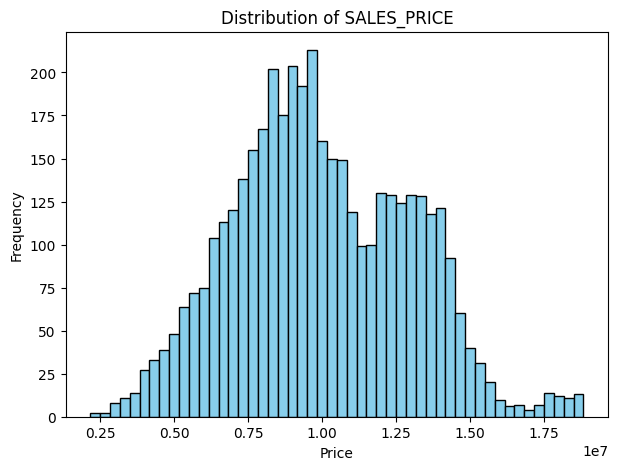

In [16]:
import pandas as pd

print("Skewness:", df['SALES_PRICE'].skew())

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(df['SALES_PRICE'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of SALES_PRICE")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


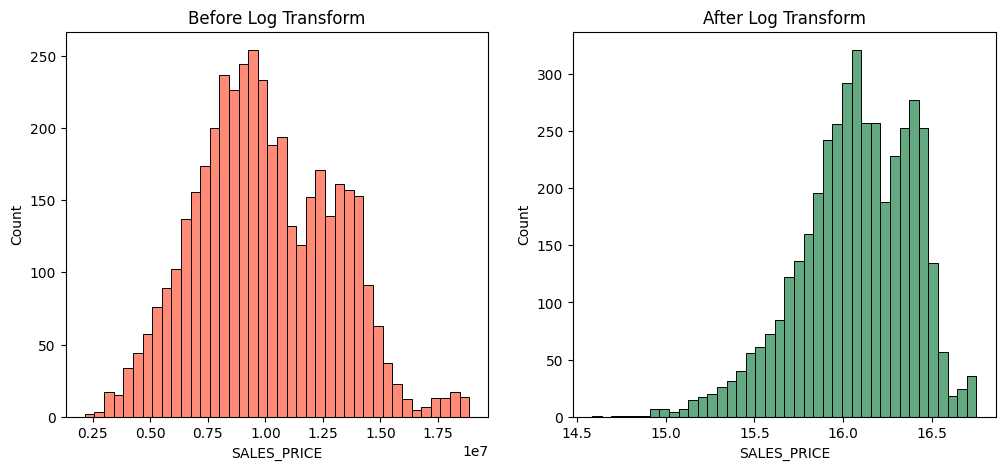

In [17]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['SALES_PRICE'], bins=40, color='tomato')
plt.title("Before Log Transform")

plt.subplot(1,2,2)
sns.histplot(np.log(df['SALES_PRICE']), bins=40, color='seagreen')
plt.title("After Log Transform")
plt.show()


In [18]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# --- Load & clean ---
train_path = '/content/chennai_80'
df = pd.read_csv(train_path)

# drop any "Unnamed:*" index columns
df = df.loc[:, ~df.columns.str.contains(r'^Unnamed')]

# keep only rows with valid positive price (needed for log)
df = df[df['SALES_PRICE'] > 0].copy()

# --- Features/Target ---
X = df.drop(columns=['SALES_PRICE'])
y_log = np.log(df['SALES_PRICE'])          # <-- LOG target

# detect categorical columns from training X
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# build Pool so CatBoost handles categoricals
train_pool = Pool(data=X, label=y_log, cat_features=cat_features)

# --- Train CatBoost (solid defaults for accuracy) ---
model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=300,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    subsample=0.9,
    random_seed=42,
    verbose=200
)
model.fit(train_pool)

# save
model.save_model('/content/catboost_chennai_logprice.cbm')
print("✅ Trained on LOG(price) and saved model.")


Categorical features: ['PRT_ID', 'AREA', 'PARK_FACIL', 'STREET']
0:	learn: 0.3086783	total: 30.2ms	remaining: 9.03s
200:	learn: 0.0876063	total: 3s	remaining: 1.48s
299:	learn: 0.0815415	total: 4.03s	remaining: 0us
✅ Trained on LOG(price) and saved model.


In [19]:
# paths
test_path = '/content/chennai_20'  # file WITHOUT SALES_PRICE
model_path = '/content/catboost_chennai_logprice.cbm'
out_path  = '/content/Chennai_20_with_predicted_price.csv'

# reload training schema to align columns
train_df = pd.read_csv('/content/chennai_80')
train_df = train_df.loc[:, ~train_df.columns.str.contains(r'^Unnamed')]
expected_features = [c for c in train_df.columns if c != 'SALES_PRICE']
cat_features = pd.DataFrame(train_df[expected_features]).select_dtypes(include=['object']).columns.tolist()

# load model
m = CatBoostRegressor()
m.load_model(model_path)

# load 20% and align columns
test_df = pd.read_csv(test_path).copy()
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan
X_test = test_df[expected_features]
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

test_pool = Pool(data=X_test, cat_features=cat_features)

# predict LOG(price) -> convert back to ₹
pred_log = m.predict(test_pool)
pred_rs = np.exp(pred_log)                 # back-transform to rupees

test_df['PREDICTED_SALES_PRICE'] = pred_rs
test_df.to_csv(out_path, index=False)
print("✅ Predictions saved to:", out_path)
test_df[['PREDICTED_SALES_PRICE']].head()


✅ Predictions saved to: /content/Chennai_20_with_predicted_price.csv


/tmp/ipython-input-1784279430.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[c] = X_test[c].astype(str)
/tmp/ipython-input-1784279430.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[c] = X_test[c].astype(str)
/tmp/ipython-input-1784279430.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,PREDICTED_SALES_PRICE
0,12430412.86
1,9059016.48
2,8182440.96
3,10910965.07
4,9063506.83


In [21]:
from sklearn.metrics import r2_score, mean_squared_error

pred_path   = '/content/Chennai_20_with_predicted_price.csv'
actual_path = '/content/Chennai_price'   # adjust name if different

pred_df = pd.read_csv(pred_path)
act_df  = pd.read_csv(actual_path)

# join on a reliable key (e.g., PRT_ID). If same order, use concat.
key = 'PRT_ID'  # change if your key differs
if key in pred_df.columns and key in act_df.columns:
    combined = act_df.merge(pred_df[[key, 'PREDICTED_SALES_PRICE']], on=key, how='inner')
else:
    combined = pd.concat([act_df.reset_index(drop=True),
                          pred_df['PREDICTED_SALES_PRICE']], axis=1)

r2 = r2_score(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE'])
rmse = np.sqrt(mean_squared_error(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE']))

print(f"R²: {r2:.4f}")
print(f"RMSE: ₹{rmse:,.0f}")


R²: 0.9019
RMSE: ₹914,385


Categorical features: ['PRT_ID', 'AREA', 'PARK_FACIL', 'STREET']
0:	learn: 0.3082996	total: 8.3ms	remaining: 3.44s
200:	learn: 0.0887459	total: 5.45s	remaining: 5.8s
400:	learn: 0.0787722	total: 10.1s	remaining: 354ms
414:	learn: 0.0782612	total: 10.5s	remaining: 0us
✅ Trained (log target) & saved: /content/catboost_chennai_logprice.cbm
✅ Saved predictions to: /content/Chennai_20_with_predicted_price.csv


,PREDICTED_SALES_PRICE
0,12324750.95
1,9145898.37
2,8109768.76
3,10854595.10
4,8940029.34


R²: 0.9032
RMSE: ₹908,024
Top 15 Most Important Features:
       Feature Id  Importances
0         REG_FEE        52.00
1            AREA        30.37
2          STREET         3.83
3        INT_SQFT         3.21
4      PARK_FACIL         2.35
5    SQFTxBEDROOM         2.08
6     QS_BATHROOM         1.54
7   DIST_MAINROAD         1.47
8      QS_BEDROOM         1.41
9        QS_ROOMS         1.34
10      N_BEDROOM         0.41
11         PRT_ID         0.00


/tmp/ipython-input-1437297431.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importances', y='Feature Id', data=feature_importances.head(15), palette='coolwarm')


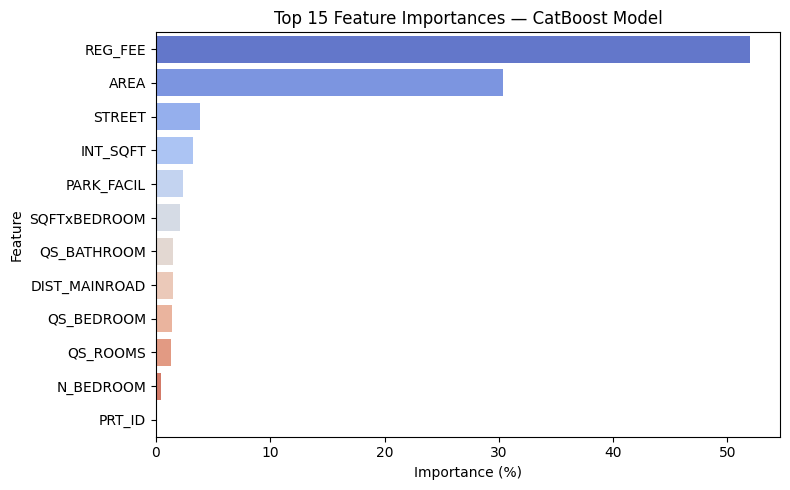

In [22]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error

# ---------- Paths ----------
TRAIN_PATH = '/content/chennai_80'       # 80% train
TEST_PATH  = '/content/chennai_20'       # 20% (no price)
ACTUAL20   = '/content/Chennai_price'        # 20% with SALES_PRICE (if you have it)
MODEL_PATH = '/content/catboost_chennai_logprice.cbm'
PRED_PATH  = '/content/Chennai_20_with_predicted_price.csv'

# ---------- Helpers ----------
def drop_unnamed(df: pd.DataFrame) -> pd.DataFrame:
    return df.loc[:, ~df.columns.str.contains(r'^Unnamed')]

def cap_outliers(series: pd.Series, q_low=0.01, q_high=0.99):
    lo, hi = series.quantile(q_low), series.quantile(q_high)
    return series.clip(lower=lo, upper=hi)

def build_features(df: pd.DataFrame) -> pd.DataFrame:
    """Create leak-free features (do NOT use price)."""
    out = df.copy()
    out = drop_unnamed(out)

    # Robust caps for a few heavy-tailed numerics (if present)
    for col in ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'AGE_BUILDING']:
        if col in out.columns:
            out[col] = cap_outliers(out[col]) if np.issubdtype(out[col].dtype, np.number) else out[col]

    # Safe engineered features (no price used)
    if {'INT_SQFT','N_BEDROOM'}.issubset(out.columns):
        out['SQFTxBEDROOM'] = out['INT_SQFT'] * out['N_BEDROOM']
    if {'INT_SQFT','N_BATHROOM'}.issubset(out.columns):
        out['SQFTxBATHROOM'] = out['INT_SQFT'] * out['N_BATHROOM']
    if {'INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM'}.issubset(out.columns):
        denom = (out['N_BEDROOM'].fillna(0)+out['N_BATHROOM'].fillna(0)+out['N_ROOM'].fillna(0)).replace(0,1)
        out['SQFT_PER_ROOM'] = out['INT_SQFT'] / denom

    # Age bins (categorical)
    if 'AGE_BUILDING' in out.columns:
        out['AGE_BIN'] = pd.cut(out['AGE_BUILDING'], bins=[-1,10,20,1000], labels=['New','Mid','Old'])

    return out

# ---------- 1) Load & prepare training ----------
train_df = pd.read_csv(TRAIN_PATH)
train_df = drop_unnamed(train_df)
train_df = train_df[train_df['SALES_PRICE'] > 0].copy()

# Cap target outliers (helps RMSE while keeping distribution shape for log)
train_df['SALES_PRICE'] = cap_outliers(train_df['SALES_PRICE'], 0.01, 0.99)

# Build features (NO leakage)
X_full = build_features(train_df)
y_log  = np.log(train_df['SALES_PRICE'])

# Separate target & drop it from features
if 'SALES_PRICE' in X_full.columns:
    X_full = X_full.drop(columns=['SALES_PRICE'])

# Detect categoricals
cat_features = X_full.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical features:", cat_features)

# Pools
train_pool = Pool(X_full, label=y_log, cat_features=cat_features)

# ---------- 2) Train CatBoost (tuned strong defaults) ----------
model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=415,
    learning_rate=0.03,
    depth=10,
    l2_leaf_reg=5,
    subsample=0.8,
    random_seed=42,
    verbose=200
)
model.fit(train_pool)
model.save_model(MODEL_PATH)
print("✅ Trained (log target) & saved:", MODEL_PATH)

# ---------- (Optional) Small hyperparam search ----------
# Uncomment to try; will take longer.
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'iterations': [1000, 1200, 1500],
#     'depth': [8, 10],
#     'learning_rate': [0.03, 0.04, 0.05],
#     'l2_leaf_reg': [3, 5, 7],
#     'subsample': [0.8, 0.9, 1.0],
# }
# base = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=0)
# search = RandomizedSearchCV(base, param_distributions=param_dist, n_iter=12, cv=3,
#                             scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
# search.fit(X_full, y_log, cat_features=cat_features)
# print("Best params:", search.best_params_)
# model = search.best_estimator_
# model.fit(train_pool)
# model.save_model(MODEL_PATH)

# ---------- 3) Predict on 20% (no price) ----------
test_df = pd.read_csv(TEST_PATH)
test_df = drop_unnamed(test_df)

# Build test features with same logic
X_test = build_features(test_df)

# Ensure columns align with train features (add missing, order same)
for col in X_full.columns:
    if col not in X_test.columns:
        X_test[col] = np.nan
X_test = X_test[X_full.columns]

# Cast categoricals
for c in cat_features:
    X_test[c] = X_test[c].astype('string')

test_pool = Pool(X_test, cat_features=cat_features)
pred_log = model.predict(test_pool)
pred_rs  = np.exp(pred_log)  # back to ₹

out = test_df.copy()
out['PREDICTED_SALES_PRICE'] = pred_rs
out.to_csv(PRED_PATH, index=False)
print("✅ Saved predictions to:", PRED_PATH)
display(out[['PREDICTED_SALES_PRICE']].head())

# ---------- 4) Evaluate vs actual 20% (if available) ----------
try:
    actual_df = pd.read_csv(ACTUAL20)
    actual_df = drop_unnamed(actual_df)

    # Try to merge on an ID if present; else fallback to row order
    join_key = None
    for k in ['PRT_ID','ID','PROPERTY_ID']:
        if k in actual_df.columns and k in out.columns:
            join_key = k
            break

    if join_key:
        comb = actual_df.merge(out[[join_key,'PREDICTED_SALES_PRICE']], on=join_key, how='inner')
    else:
        comb = pd.concat([actual_df.reset_index(drop=True),
                          out['PREDICTED_SALES_PRICE'].reset_index(drop=True)], axis=1)

    if 'SALES_PRICE' in comb.columns:
        r2   = r2_score(comb['SALES_PRICE'], comb['PREDICTED_SALES_PRICE'])
        rmse = np.sqrt(mean_squared_error(comb['SALES_PRICE'], comb['PREDICTED_SALES_PRICE']))
        print(f"R²: {r2:.4f}")
        print(f"RMSE: ₹{rmse:,.0f}")
    else:
        print("ℹ️ Evaluation skipped: 'SALES_PRICE' column not found in ACTUAL20 file.")
except Exception as e:
    print("ℹ️ Evaluation step skipped or failed:", e)

import matplotlib.pyplot as plt
import seaborn as sns

# Get and sort feature importances
feature_importances = model.get_feature_importance(prettified=True)
feature_importances = feature_importances.sort_values(by='Importances', ascending=False)

# Show top 15 in table
print("Top 15 Most Important Features:")
print(feature_importances.head(15))

# Visualize
plt.figure(figsize=(8,5))
sns.barplot(x='Importances', y='Feature Id', data=feature_importances.head(15), palette='coolwarm')
plt.title('Top 15 Feature Importances — CatBoost Model')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [23]:
df[['REG_FEE','SALES_PRICE']].corr()


,REG_FEE,SALES_PRICE
REG_FEE,1.00,0.84
SALES_PRICE,0.84,1.00


In [24]:
chennai_80.loc[(chennai_80["DIST_MAINROAD"]>150) & (chennai_80["STREET"]=="Paved")]

,Unnamed: 0.1,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
23,23,23,P07458,Adyar,1072,152,1.00,No,318705,10280800,Paved,5.00,2.50,2.80
27,27,27,P03386,Velchery,1798,188,2.00,Yes,362052,10648590,Paved,3.60,3.90,4.20
40,40,40,P08120,Anna Nagar,1643,197,1.00,Yes,386521,12078770,Paved,4.00,2.50,3.20
51,51,51,P03808,Karapakkam,1014,195,1.00,Yes,414617,9642250,Paved,4.80,2.50,3.80
74,74,74,P02678,Adyar,1138,194,1.00,No,269645,7704145,Paved,4.20,4.20,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,4097,4097,P00847,Chrompt,1288,159,2.00,Yes,489197,15780550,Paved,5.00,2.50,2.40
4104,4104,4104,P02887,Adyar,603,181,1.00,No,202996,5342000,Paved,4.00,4.20,3.60
4113,4113,4113,P08710,Adyar,625,168,1.00,No,262173,8739100,Paved,3.10,3.60,4.40
4151,4151,4151,P07526,KK Nagar,1483,161,2.00,No,324001,8756780,Paved,3.70,4.70,3.20


In [26]:
file_path="/content/Chennai_csv.csv"
chennai=pd.read_csv(file_path)

In [ ]:
chennai.isna().sum()

,0
Unnamed: 0,0
PRT_ID,0
AREA,0
INT_SQFT,0
DIST_MAINROAD,0
N_BEDROOM,0
N_BATHROOM,0
PARK_FACIL,0
REG_FEE,0
SALES_PRICE,0


In [27]:
correlation_matrix = chennai_80.corr(numeric_only=True)
display(correlation_matrix)

,Unnamed: 0.1,Unnamed: 0,INT_SQFT,DIST_MAINROAD,N_BEDROOM,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
Unnamed: 0.1,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.01,0.01,-0.03,0.02
Unnamed: 0,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.01,0.01,-0.03,0.02
INT_SQFT,-0.02,-0.02,1.00,0.00,0.66,0.63,0.63,0.01,-0.01,0.01
DIST_MAINROAD,-0.01,-0.01,0.00,1.00,-0.00,0.02,0.02,0.01,-0.03,-0.01
N_BEDROOM,-0.04,-0.04,0.66,-0.00,1.00,0.37,0.33,0.01,-0.01,0.01
REG_FEE,0.00,0.00,0.63,0.02,0.37,1.00,0.84,0.02,-0.02,0.01
SALES_PRICE,0.01,0.01,0.63,0.02,0.33,0.84,1.00,0.02,-0.02,0.02
QS_ROOMS,0.01,0.01,0.01,0.01,0.01,0.02,0.02,1.00,-0.01,0.01
QS_BATHROOM,-0.03,-0.03,-0.01,-0.03,-0.01,-0.02,-0.02,-0.01,1.00,0.00
QS_BEDROOM,0.02,0.02,0.01,-0.01,0.01,0.01,0.02,0.01,0.00,1.00


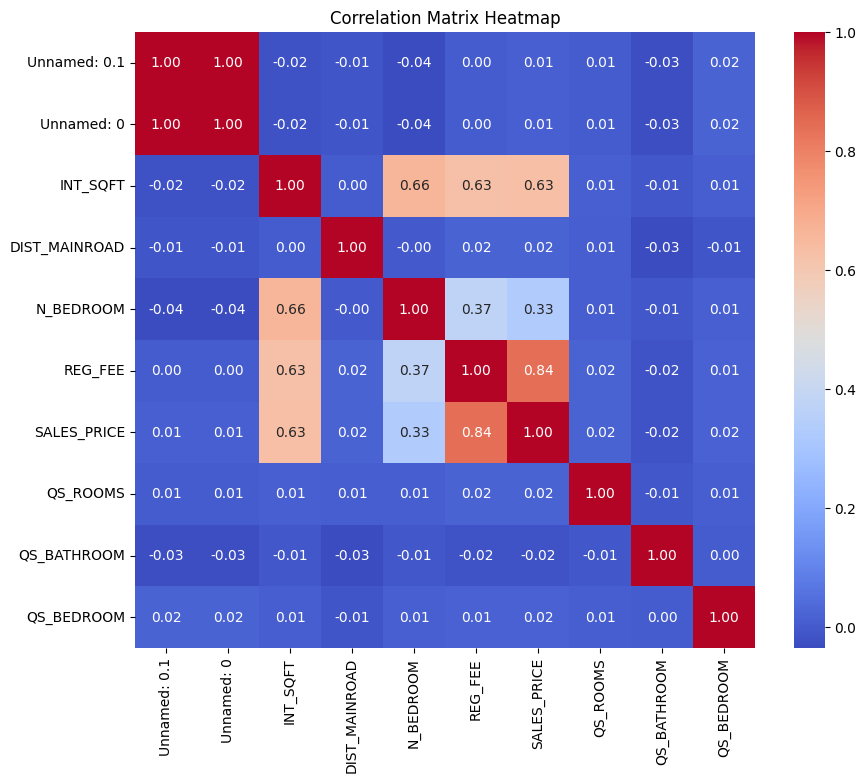

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
chennai_80.to_csv("chennai_80")

In [31]:
chennai_80

,Unnamed: 0.1,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
0,0,0,P03174,Karapakkam,817,28,1.00,Yes,378405,8409000,No Access,4.90,3.20,4.10
1,1,1,P01456,Chrompt,988,41,1.00,Yes,218954,8109400,No Access,3.60,4.60,4.80
2,2,2,P06191,Karapakkam,521,51,1.00,No,71177,2156875,No Access,4.10,4.20,2.70
3,3,3,P08311,Chrompt,1275,146,2.00,No,378235,14008700,Paved,3.00,4.80,3.90
4,4,4,P07536,T Nagar,1843,118,2.00,Yes,367560,13613320,No Access,2.10,4.70,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,4156,P04599,Chrompt,912,199,1.00,Yes,359082,11583300,Paved,4.70,3.40,2.60
4157,4157,4157,P09106,Chrompt,906,6,1.00,No,229307,7643550,Gravel,3.90,4.80,4.30
4158,4158,4158,P06324,Karapakkam,672,141,1.00,Yes,301613,6032250,Gravel,3.30,2.90,3.30
4159,4159,4159,P00324,Chrompt,1033,86,1.00,No,358672,11570050,Paved,3.60,4.20,4.80


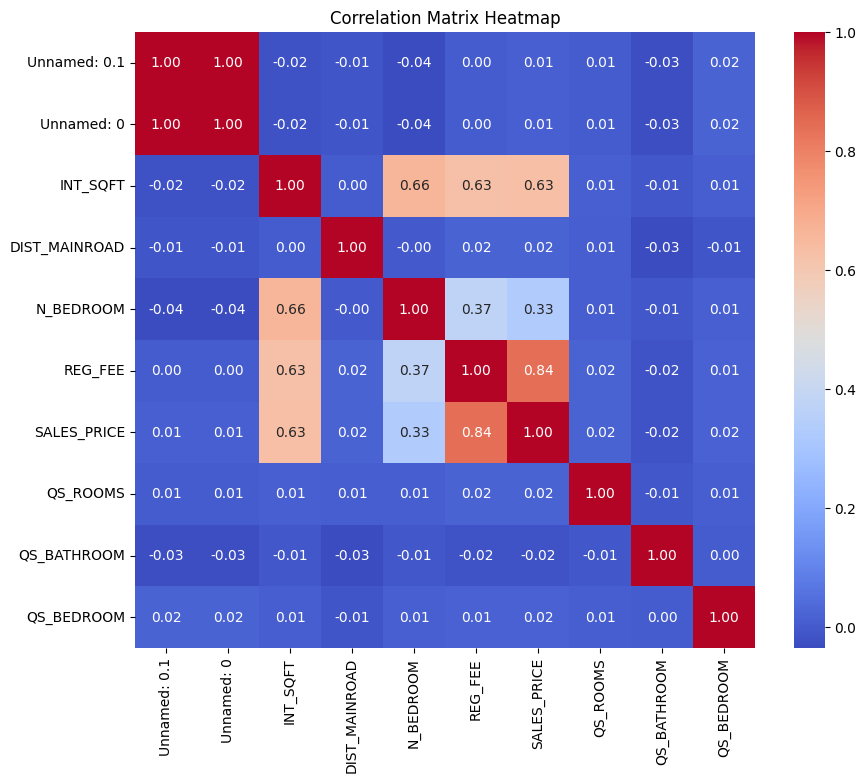

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
correlation_matrix_chennai_80 = chennai_80.corr(numeric_only=True)
display(correlation_matrix_chennai_80)

,Unnamed: 0.1,Unnamed: 0,INT_SQFT,DIST_MAINROAD,N_BEDROOM,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
Unnamed: 0.1,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.01,0.01,-0.03,0.02
Unnamed: 0,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.01,0.01,-0.03,0.02
INT_SQFT,-0.02,-0.02,1.00,0.00,0.66,0.63,0.63,0.01,-0.01,0.01
DIST_MAINROAD,-0.01,-0.01,0.00,1.00,-0.00,0.02,0.02,0.01,-0.03,-0.01
N_BEDROOM,-0.04,-0.04,0.66,-0.00,1.00,0.37,0.33,0.01,-0.01,0.01
REG_FEE,0.00,0.00,0.63,0.02,0.37,1.00,0.84,0.02,-0.02,0.01
SALES_PRICE,0.01,0.01,0.63,0.02,0.33,0.84,1.00,0.02,-0.02,0.02
QS_ROOMS,0.01,0.01,0.01,0.01,0.01,0.02,0.02,1.00,-0.01,0.01
QS_BATHROOM,-0.03,-0.03,-0.01,-0.03,-0.01,-0.02,-0.02,-0.01,1.00,0.00
QS_BEDROOM,0.02,0.02,0.01,-0.01,0.01,0.01,0.02,0.01,0.00,1.00


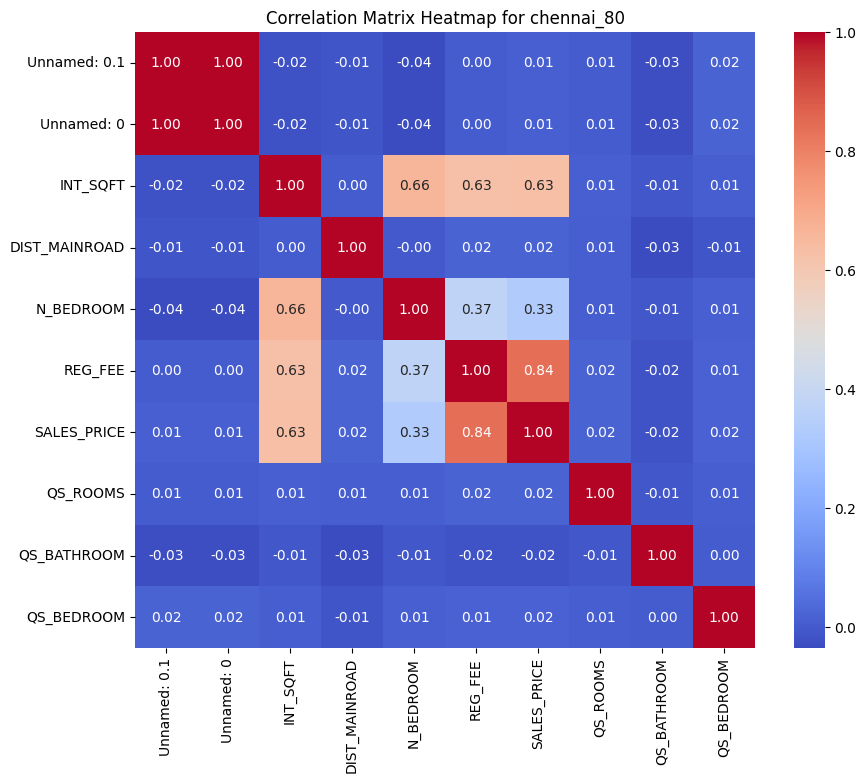

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_chennai_80, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for chennai_80')
plt.show()

In [35]:
chennai_80["QS_ROOMS"].unique()

array([4.9, 3.6, 4.1, 3. , 2.1, 3.3, 3.5, 4. , 2.6, 4.7, 3.2, 2.2, 3.9,
       2.9, 3.4, 5. , 4.2, 4.5, 2. , 2.5, 3.1, 2.4, 4.6, 2.3, 2.8, 4.8,
       3.7, 2.7, 3.8, 4.4, 4.3])

In [36]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/chennai_80')

# Load data
df = pd.read_csv('/content/chennai_80')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

SELECT_NUM = [ "INT_SQFT",
]
SELECT_CAT = [  # categorical features you want
    # e.g., "LOCALITY", "FURNISHING", "BUILDER"
]

# Separate features and target
X = df.drop(['SALES_PRICE'], axis=1)
y = df['SALES_PRICE']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_chennai_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())

Categorical features: ['PRT_ID', 'AREA', 'PARK_FACIL', 'STREET']
0:	learn: 2855316.4792562	total: 5.36ms	remaining: 1.6s
200:	learn: 915030.7114425	total: 1.04s	remaining: 514ms
299:	learn: 871307.5227543	total: 1.58s	remaining: 0us
✅ Model trained successfully and saved!
Numeric features used: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'REG_FEE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM']


In [37]:
chennai_80["PARK_FACIL"].replace("Yes",1,inplace=True)

/tmp/ipython-input-2836590345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chennai_80["PARK_FACIL"].replace("Yes",1,inplace=True)


In [38]:
chennai_80["PARK_FACIL"].replace("No","1",inplace=True)


/tmp/ipython-input-3312006536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chennai_80["PARK_FACIL"].replace("No","1",inplace=True)


In [39]:
chennai_80["PARK_FACIL"].replace("1",0,inplace=True)

/tmp/ipython-input-2565359189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chennai_80["PARK_FACIL"].replace("1",0,inplace=True)
/tmp/ipython-input-2565359189.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chennai_80["PARK_FACIL"].replace("1",0,inplace=True)


In [40]:
chennai_80

,Unnamed: 0.1,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
0,0,0,P03174,Karapakkam,817,28,1.00,1,378405,8409000,No Access,4.90,3.20,4.10
1,1,1,P01456,Chrompt,988,41,1.00,1,218954,8109400,No Access,3.60,4.60,4.80
2,2,2,P06191,Karapakkam,521,51,1.00,0,71177,2156875,No Access,4.10,4.20,2.70
3,3,3,P08311,Chrompt,1275,146,2.00,0,378235,14008700,Paved,3.00,4.80,3.90
4,4,4,P07536,T Nagar,1843,118,2.00,1,367560,13613320,No Access,2.10,4.70,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,4156,P04599,Chrompt,912,199,1.00,1,359082,11583300,Paved,4.70,3.40,2.60
4157,4157,4157,P09106,Chrompt,906,6,1.00,0,229307,7643550,Gravel,3.90,4.80,4.30
4158,4158,4158,P06324,Karapakkam,672,141,1.00,1,301613,6032250,Gravel,3.30,2.90,3.30
4159,4159,4159,P00324,Chrompt,1033,86,1.00,0,358672,11570050,Paved,3.60,4.20,4.80


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chennai_80['STREET_ENC'] = le.fit_transform(chennai_80['STREET'])

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chennai_80['AREA_ENC'] = le.fit_transform(chennai_80['AREA'])

In [43]:
chennai_80["AREA_ENC"].unique()

array([4, 2, 5, 6, 3, 0, 1])

In [44]:
chennai_80.drop(["AREA","STREET"],axis=1,inplace=True)

In [45]:
chennai_80.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
PRT_ID,object
INT_SQFT,int64
DIST_MAINROAD,int64
N_BEDROOM,float64
PARK_FACIL,int64
REG_FEE,int64
SALES_PRICE,int64
QS_ROOMS,float64


In [46]:
chennai_80.to_csv("chennai_80.numeric")

In [47]:
chennai_20

,Unnamed: 0.1,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM
0,0,0,P08148,Chrompt,950,24,1.00,Yes,379944,No Access,3.80,4.70,4.60
1,1,1,P09831,Velchery,1661,31,2.00,Yes,306505,Gravel,2.30,4.60,3.50
2,2,2,P10033,Velchery,1699,5,2.00,Yes,263294,Paved,2.50,2.10,4.00
3,3,3,P03987,Adyar,973,4,1.00,No,393869,No Access,4.30,2.80,4.70
4,4,4,P01843,Karapakkam,1246,31,1.00,Yes,381960,No Access,4.10,2.60,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1046,1046,P05971,T Nagar,1764,118,1.00,Yes,391192,No Access,3.80,2.70,4.80
1047,1047,1047,P06599,Karapakkam,643,167,1.00,No,266541,No Access,2.20,4.20,3.60
1048,1048,1048,P07094,Anna Nagar,1780,27,1.00,Yes,520955,Paved,3.60,2.20,3.90
1049,1049,1049,P00221,Chrompt,868,171,1.00,No,189725,No Access,2.80,4.00,4.30


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chennai_20['STREET_ENC'] = le.fit_transform(chennai_20['STREET'])

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chennai_20['AREA_ENC'] = le.fit_transform(chennai_20['AREA'])

In [50]:
chennai_20.drop(["AREA","STREET"],axis=1,inplace=True)

In [51]:
chennai_20['PARK_FACIL'].replace("Yes",1,inplace=True)

/tmp/ipython-input-2318952990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chennai_20['PARK_FACIL'].replace("Yes",1,inplace=True)


In [52]:
chennai_20['PARK_FACIL'].replace("No",0,inplace=True)


/tmp/ipython-input-641804424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chennai_20['PARK_FACIL'].replace("No",0,inplace=True)
/tmp/ipython-input-641804424.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chennai_20['PARK_FACIL'].replace("No",0,inplace=True)


In [53]:
chennai_20.to_csv("chennai_20.numeric")

In [54]:
file_path="/content/chennai_80.numeric"
chennai_80.numeric=pd.read_csv(file_path)

/tmp/ipython-input-462413125.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  chennai_80.numeric=pd.read_csv(file_path)


In [55]:
file_path="/content/chennai_20.numeric"
chennai_20.numeric=pd.read_csv(file_path)

/tmp/ipython-input-1965631092.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  chennai_20.numeric=pd.read_csv(file_path)


In [56]:
correlation_matrix_chennai_80.numeric = chennai_80.numeric.corr(numeric_only=True)
display(correlation_matrix_chennai_80.numeric)



/tmp/ipython-input-4026997439.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  correlation_matrix_chennai_80.numeric = chennai_80.numeric.corr(numeric_only=True)


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,STREET_ENC,AREA_ENC
Unnamed: 0.2,1.00,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.00,0.01,0.01,-0.03,0.02,-0.02,-0.02
Unnamed: 0.1,1.00,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.00,0.01,0.01,-0.03,0.02,-0.02,-0.02
Unnamed: 0,1.00,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.00,0.01,0.01,-0.03,0.02,-0.02,-0.02
INT_SQFT,-0.02,-0.02,-0.02,1.00,0.00,0.66,-0.02,0.63,0.63,0.01,-0.01,0.01,0.01,0.34
DIST_MAINROAD,-0.01,-0.01,-0.01,0.00,1.00,-0.00,-0.02,0.02,0.02,0.01,-0.03,-0.01,0.01,-0.02
N_BEDROOM,-0.04,-0.04,-0.04,0.66,-0.00,1.00,-0.02,0.37,0.33,0.01,-0.01,0.01,0.02,0.41
PARK_FACIL,0.00,0.00,0.00,-0.02,-0.02,-0.02,1.00,0.14,0.14,-0.01,-0.02,-0.00,0.00,-0.01
REG_FEE,0.00,0.00,0.00,0.63,0.02,0.37,0.14,1.00,0.84,0.02,-0.02,0.01,-0.05,0.09
SALES_PRICE,0.01,0.01,0.01,0.63,0.02,0.33,0.14,0.84,1.00,0.02,-0.02,0.02,-0.06,-0.05
QS_ROOMS,0.01,0.01,0.01,0.01,0.01,0.01,-0.01,0.02,0.02,1.00,-0.01,0.01,0.01,0.01


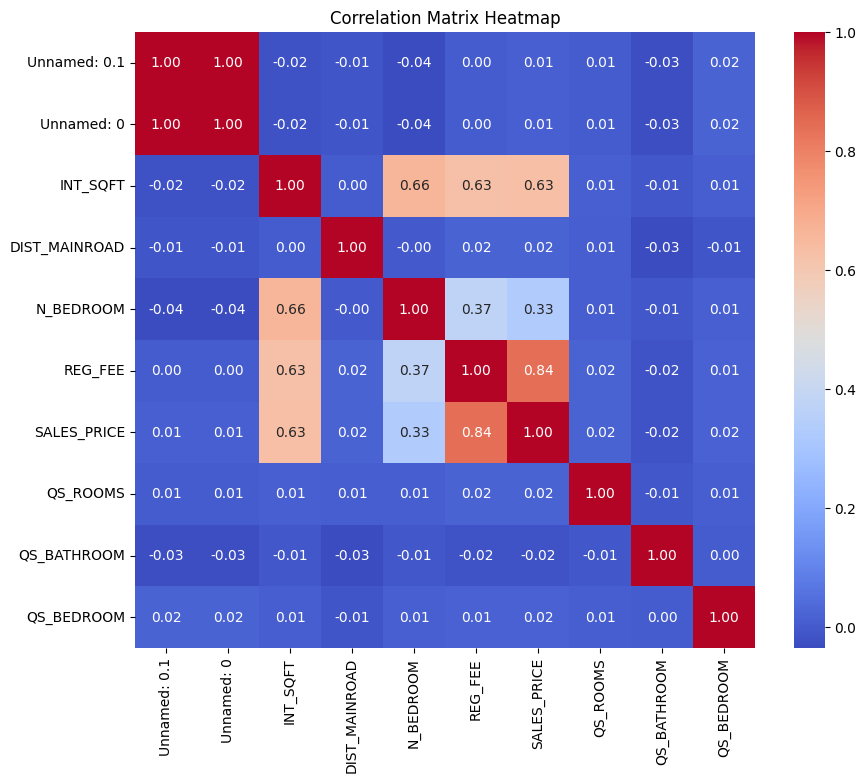

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [58]:
chennai_80

,Unnamed: 0.1,Unnamed: 0,PRT_ID,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,STREET_ENC,AREA_ENC
0,0,0,P03174,817,28,1.00,1,378405,8409000,4.90,3.20,4.10,1,4
1,1,1,P01456,988,41,1.00,1,218954,8109400,3.60,4.60,4.80,1,2
2,2,2,P06191,521,51,1.00,0,71177,2156875,4.10,4.20,2.70,1,4
3,3,3,P08311,1275,146,2.00,0,378235,14008700,3.00,4.80,3.90,2,2
4,4,4,P07536,1843,118,2.00,1,367560,13613320,2.10,4.70,3.00,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,4156,P04599,912,199,1.00,1,359082,11583300,4.70,3.40,2.60,2,2
4157,4157,4157,P09106,906,6,1.00,0,229307,7643550,3.90,4.80,4.30,0,2
4158,4158,4158,P06324,672,141,1.00,1,301613,6032250,3.30,2.90,3.30,0,4
4159,4159,4159,P00324,1033,86,1.00,0,358672,11570050,3.60,4.20,4.80,2,2


In [59]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/chennai_80.numeric')

# Load data
df = pd.read_csv('/content/chennai_80.numeric')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df =df.loc[:, ~df.columns.str.contains('^PRT_ID')]

# # Separate features and target
# X = df.drop(['SALES_PRICE'], axis=1)
# y = df['SALES_PRICE']


# Separate features and target
X = df.drop(['SALES_PRICE'], axis=1)
y = df['SALES_PRICE']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_chennai_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())



Categorical features: ['PRT_ID']
0:	learn: 2857250.4587076	total: 13.5ms	remaining: 4.05s
200:	learn: 897581.5737381	total: 1.85s	remaining: 910ms
299:	learn: 844969.3873436	total: 2.83s	remaining: 0us
✅ Model trained successfully and saved!
Numeric features used: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'PARK_FACIL', 'REG_FEE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'STREET_ENC', 'AREA_ENC']


In [60]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# Paths (adjust if your filenames differ)
train_path = '/content/chennai_80.numeric'
test_path = '/content/chennai_20.numeric'
model_path = '/content/catboost_chennai_model.cbm'

# Load training data to get schema
train_df = pd.read_csv(train_path)
expected_features = [c for c in train_df.columns if c != 'SALES_PRICE']

# Detect categorical columns from training data
cat_features = train_df[expected_features].select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Load trained CatBoost model
model = CatBoostRegressor()
model.load_model(model_path)

# Load test data (without price)
test_df = pd.read_csv(test_path).copy()

# Make sure the test data has same columns as training data
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# Reorder columns to match training
X_test = test_df[expected_features]

# Convert categorical features to string type
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

# Create Pool for CatBoost
test_pool = Pool(data=X_test, cat_features=cat_features)

# Predict prices
predictions = model.predict(test_pool)

# Add predictions to your test dataframe
test_df['PREDICTED_SALES_PRICE'] = predictions

# Save new CSV with predictions
output_path = '/content/Chennai_20_with_predicted_price.csv'
test_df.to_csv(output_path, index=False)

print("✅ Prediction complete! File saved as:", output_path)

# Display predictions in full number format
pd.options.display.float_format = '{:.2f}'.format

display(test_df[['PREDICTED_SALES_PRICE']].head())



Categorical features: ['PRT_ID']
✅ Prediction complete! File saved as: /content/Chennai_20_with_predicted_price.csv


,PREDICTED_SALES_PRICE
0,12435975.56
1,9267749.49
2,7966086.26
3,11112992.53
4,8856349.43


In [61]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/Chennai_20_with_predicted_price.csv'
actual_path = '/content/Chennai_price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['PRT_ID', 'PREDICTED_SALES_PRICE']], on='PRT_ID', how='inner')


# Calculate metrics
r2 = r2_score(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE'])
rmse = np.sqrt(mean_squared_error(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['SALES_PRICE', 'PREDICTED_SALES_PRICE']].head(10)
print("\nSample comparison:")
print(comparison)

R-squared (Accuracy): 0.9011
Root Mean Squared Error (RMSE): 917,806.10

Sample comparison:
   SALES_PRICE  PREDICTED_SALES_PRICE
0     11873250            12435975.56
1      8514030             9267749.49
2      7313720             7966086.26
3     10940805            11112992.53
4      7957500             8856349.43
5      9449730             8726836.36
6      8434750             8396459.71
7      9042050             9302486.30
8      3948000             3921324.58
9     11560690            12015495.29


In [62]:
chennai_80.numeric

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,PRT_ID,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,STREET_ENC,AREA_ENC
0,0,0,0,P03174,817,28,1.00,1,378405,8409000,4.90,3.20,4.10,1,4
1,1,1,1,P01456,988,41,1.00,1,218954,8109400,3.60,4.60,4.80,1,2
2,2,2,2,P06191,521,51,1.00,0,71177,2156875,4.10,4.20,2.70,1,4
3,3,3,3,P08311,1275,146,2.00,0,378235,14008700,3.00,4.80,3.90,2,2
4,4,4,4,P07536,1843,118,2.00,1,367560,13613320,2.10,4.70,3.00,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,4156,4156,P04599,912,199,1.00,1,359082,11583300,4.70,3.40,2.60,2,2
4157,4157,4157,4157,P09106,906,6,1.00,0,229307,7643550,3.90,4.80,4.30,0,2
4158,4158,4158,4158,P06324,672,141,1.00,1,301613,6032250,3.30,2.90,3.30,0,4
4159,4159,4159,4159,P00324,1033,86,1.00,0,358672,11570050,3.60,4.20,4.80,2,2


In [63]:
correlation_matrix_chennai_80_numeric = chennai_80.numeric.corr(numeric_only=True)
display(correlation_matrix_chennai_80_numeric)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,INT_SQFT,DIST_MAINROAD,N_BEDROOM,PARK_FACIL,REG_FEE,SALES_PRICE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,STREET_ENC,AREA_ENC
Unnamed: 0.2,1.00,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.00,0.01,0.01,-0.03,0.02,-0.02,-0.02
Unnamed: 0.1,1.00,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.00,0.01,0.01,-0.03,0.02,-0.02,-0.02
Unnamed: 0,1.00,1.00,1.00,-0.02,-0.01,-0.04,0.00,0.00,0.01,0.01,-0.03,0.02,-0.02,-0.02
INT_SQFT,-0.02,-0.02,-0.02,1.00,0.00,0.66,-0.02,0.63,0.63,0.01,-0.01,0.01,0.01,0.34
DIST_MAINROAD,-0.01,-0.01,-0.01,0.00,1.00,-0.00,-0.02,0.02,0.02,0.01,-0.03,-0.01,0.01,-0.02
N_BEDROOM,-0.04,-0.04,-0.04,0.66,-0.00,1.00,-0.02,0.37,0.33,0.01,-0.01,0.01,0.02,0.41
PARK_FACIL,0.00,0.00,0.00,-0.02,-0.02,-0.02,1.00,0.14,0.14,-0.01,-0.02,-0.00,0.00,-0.01
REG_FEE,0.00,0.00,0.00,0.63,0.02,0.37,0.14,1.00,0.84,0.02,-0.02,0.01,-0.05,0.09
SALES_PRICE,0.01,0.01,0.01,0.63,0.02,0.33,0.14,0.84,1.00,0.02,-0.02,0.02,-0.06,-0.05
QS_ROOMS,0.01,0.01,0.01,0.01,0.01,0.01,-0.01,0.02,0.02,1.00,-0.01,0.01,0.01,0.01


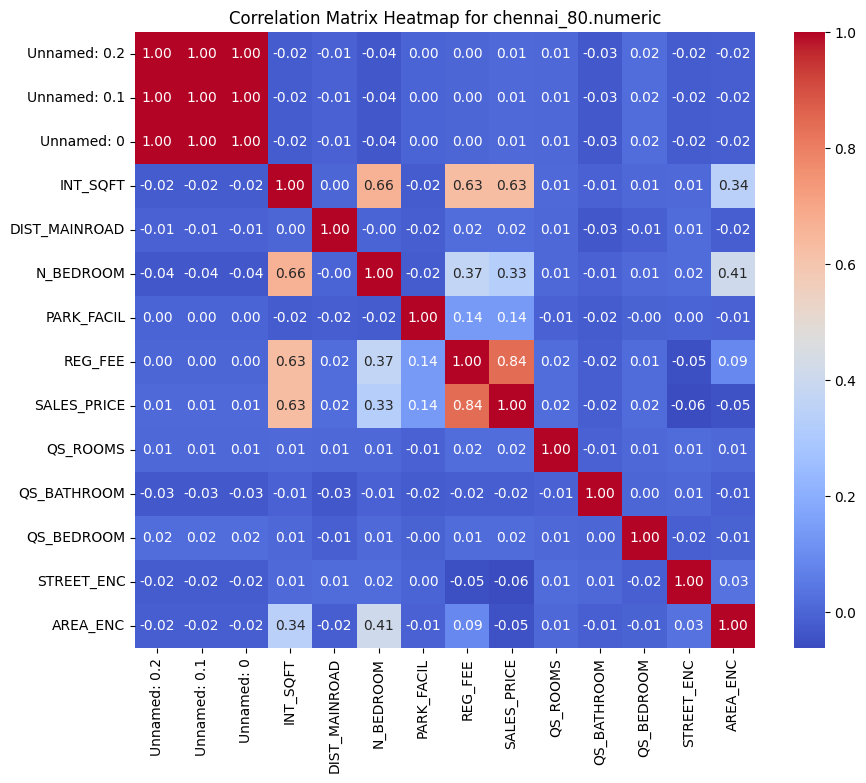

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_chennai_80_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for chennai_80.numeric')
plt.show()

In [65]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/chennai_80.numeric')

# Load data
df = pd.read_csv('/content/chennai_80.numeric')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df =df.loc[:, ~df.columns.str.contains('^PRT_ID')]

# # Separate features and target
# X = df.drop(['SALES_PRICE'], axis=1)
# y = df['SALES_PRICE']


# Separate features and target
X = df.drop(['SALES_PRICE'], axis=1)
y = df['SALES_PRICE']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_chennai_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())



Categorical features: ['PRT_ID']
0:	learn: 2857250.4587076	total: 4.46ms	remaining: 1.33s
200:	learn: 897581.5737381	total: 1.2s	remaining: 591ms
299:	learn: 844969.3873436	total: 2.06s	remaining: 0us
✅ Model trained successfully and saved!
Numeric features used: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'PARK_FACIL', 'REG_FEE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'STREET_ENC', 'AREA_ENC']


In [66]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ---------- Load Data ----------
df = pd.read_csv('/content/chennai_80.numeric')

# ✅ Remove any unwanted "Unnamed" index columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# ---------- Select only desired features ----------
selected_features = ['INT_SQFT', 'N_BEDROOM', 'PARK_FACIL', 'REG_FEE', "QS_BEDROOM", "QS_ROOMS", "DIST_MAINROAD"]
target = 'SALES_PRICE'

# Ensure all selected columns exist
missing = [col for col in selected_features + [target] if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")

# ---------- Prepare data ----------
X = df[selected_features]
y = df[target]

# If any of these are categorical (like PARK_FACIL), handle accordingly
cat_features = [col for col in X.columns if X[col].dtype == 'object']
print("Categorical features used:", cat_features)

# ---------- Create CatBoost Pool ----------
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# ---------- Initialize & Train CatBoost ----------
model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

model.fit(train_pool)

# ---------- Save Model ----------
model.save_model('catboost_chennai_model.cbm')
print("✅ Model trained successfully and saved!")



Categorical features used: []
0:	learn: 2869915.0199872	total: 2.5ms	remaining: 749ms
100:	learn: 1304301.6506744	total: 155ms	remaining: 305ms
200:	learn: 1233436.5093488	total: 313ms	remaining: 154ms
299:	learn: 1181126.0782067	total: 465ms	remaining: 0us
✅ Model trained successfully and saved!


In [68]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# ---------- Paths ----------
TRAIN_PATH = "/content/chennai_80.numeric"
TEST_PATH  = "/content/chennai_20.numeric"
ACTUAL20   = '/content/Chennai_price'        # 20% with SALES_PRICE (if you have it)
MODEL_PATH = "/content/catboost_chennai_model.cbm"
PRED_PATH  = "/content/Chennai_20_with_predicted_price.csv"

# ---------- Settings: use ONLY these features ----------
selected_features = ['INT_SQFT', 'N_BEDROOM', 'PARK_FACIL', 'REG_FEE', "QS_BEDROOM", "QS_ROOMS", "DIST_MAINROAD"]
target = "SALES_PRICE"

# ---------- Load & clean training data (for dtype/cat info) ----------
train_df = pd.read_csv(TRAIN_PATH)
train_df = train_df.loc[:, ~train_df.columns.str.contains(r"^Unnamed")]  # drop "Unnamed" cols

# make sure we have what we need
missing_train = [c for c in selected_features + [target] if c not in train_df.columns]
if missing_train:
    raise ValueError(f"Missing columns in training file: {missing_train}")

# detect which of the selected features are categorical in TRAIN
cat_features = train_df[selected_features].select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical features (from training):", cat_features)

# ---------- Load trained model ----------
model = CatBoostRegressor()
model.load_model(MODEL_PATH)

# ---------- Load & clean TEST data ----------
test_df = pd.read_csv(TEST_PATH).copy()
test_df = test_df.loc[:, ~test_df.columns.str.contains(r"^Unnamed")]     # drop "Unnamed" cols

# ensure all selected features exist in test (create as NaN if absent)
for col in selected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# keep ONLY the selected features (order matters)
X_test = test_df[selected_features].copy()

# enforce categorical dtypes to match training expectation
for c in cat_features:
    if c in X_test.columns:
        X_test[c] = X_test[c].astype("category")

# ---------- Predict ----------
test_pool = Pool(data=X_test, cat_features=cat_features)
pred = model.predict(test_pool)

# ---------- Save / show ----------
test_df["PREDICTED_SALES_PRICE"] = pred
test_df.to_csv(PRED_PATH, index=False)
print("✅ Prediction complete! File saved as:", PRED_PATH)

pd.options.display.float_format = "{:.2f}".format
display(test_df[selected_features + ["PREDICTED_SALES_PRICE"]].head())

# ---------- 4) Evaluate vs actual 20% (if available) ----------
try:
    actual_df = pd.read_csv(ACTUAL20)
    actual_df = actual_df.loc[:, ~actual_df.columns.str.contains(r"^Unnamed")]

    # Try to merge on an ID if present; else fallback to row order
    join_key = None
    for k in ['PRT_ID','ID','PROPERTY_ID']:
        if k in actual_df.columns and k in test_df.columns:
            join_key = k
            break

    if join_key:
        comb = actual_df.merge(test_df[[join_key,'PREDICTED_SALES_PRICE']], on=join_key, how='inner')
    else:
        comb = pd.concat([actual_df.reset_index(drop=True),
                          test_df['PREDICTED_SALES_PRICE'].reset_index(drop=True)], axis=1)

    if 'SALES_PRICE' in comb.columns:
        r2   = r2_score(comb['SALES_PRICE'], comb['PREDICTED_SALES_PRICE'])
        rmse = np.sqrt(mean_squared_error(comb['SALES_PRICE'], comb['PREDICTED_SALES_PRICE']))
        print(f"R²: {r2:.4f}")
        print(f"RMSE: ₹{rmse:,.0f}")
    else:
        print("ℹ️ Evaluation skipped: 'SALES_PRICE' column not found in ACTUAL20 file.")
except Exception as e:
    print("ℹ️ Evaluation step skipped or failed:", e)

Categorical features (from training): []
✅ Prediction complete! File saved as: /content/Chennai_20_with_predicted_price.csv


,INT_SQFT,N_BEDROOM,PARK_FACIL,REG_FEE,QS_BEDROOM,QS_ROOMS,DIST_MAINROAD,PREDICTED_SALES_PRICE
0,950,1.00,1,379944,4.60,3.80,24,11277194.82
1,1661,2.00,1,306505,3.50,2.30,31,8815143.62
2,1699,2.00,1,263294,4.00,2.50,5,8275201.52
3,973,1.00,0,393869,4.70,4.30,4,11722714.78
4,1246,1.00,1,381960,4.30,4.10,31,9858007.50


R²: 0.8114
RMSE: ₹1,267,687


In [69]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/Chennai_20_with_predicted_price.csv'
actual_path = '/content/Chennai_price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['PRT_ID', 'PREDICTED_SALES_PRICE']], on='PRT_ID', how='inner')


# Calculate metrics
r2 = r2_score(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE'])
rmse = np.sqrt(mean_squared_error(combined['SALES_PRICE'], combined['PREDICTED_SALES_PRICE']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['SALES_PRICE', 'PREDICTED_SALES_PRICE']].head(10)
print("\nSample comparison:")
print(comparison)

R-squared (Accuracy): 0.8114
Root Mean Squared Error (RMSE): 1,267,687.20

Sample comparison:
   SALES_PRICE  PREDICTED_SALES_PRICE
0     11873250            11277194.82
1      8514030             8815143.62
2      7313720             8275201.52
3     10940805            11722714.78
4      7957500             9858007.50
5      9449730             8138798.02
6      8434750             7651298.92
7      9042050             9570284.29
8      3948000             4085440.52
9     11560690            11103910.74


In [72]:
import pandas as pd

# Load the original chennai_80 data
original_chennai_80 = pd.read_csv("/content/chennai_80")

# Display unique values in the 'AREA' column
print(original_chennai_80["AREA"].unique())

['Karapakkam' 'Chrompt' 'T Nagar' 'Velchery' 'KK Nagar' 'Adyar'
 'Anna Nagar']
